## Importando librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
sns.set(style='whitegrid', context= 'notebook')

## Importando datos

In [6]:
import os
os.getcwd()

'C:\\Users\\DUVAN\\Documents\\Python\\Prueba tecnica data scientist I\\Scripts'

In [36]:
file_path = 'C:\\Users\\DUVAN\\Documents\\Python\\Prueba tecnica data scientist I\\Data\\sales_data.csv'
df = pd.read_csv(file_path, sep=',')

In [37]:
df.head()

,OrderID,Date,Product,Category,Price,Quantity,TotalSales,Region
0,aeb22245-970f-4cb6-af92-0287115b4db3,2025-01-05,Also,Home & Kitchen,NaN,6,158.64,East
1,aa9b5981-21b4-4346-a928-96aa11cf919c,2025-01-04,Into,Home & Kitchen,197.62,9,1778.58,North
2,01f0ef73-3da2-48df-beaf-528b319ad6d8,2025-01-04,Rule,Electronics,118.64,1,118.64,North
3,04ccede8-2047-4a6f-8988-142250aaf15c,2025-01-05,Art,Sports,71.66,2,143.32,East
4,b436fdb9-4284-436a-8f68-969ad2ec433a,2025-01-02,There,Sports,55.14,2,110.28,West


## Limpieza de datos

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 1 to 1004
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     991 non-null    object 
 1   Date        991 non-null    object 
 2   Product     991 non-null    object 
 3   Category    991 non-null    object 
 4   Price       991 non-null    float64
 5   Quantity    991 non-null    int64  
 6   TotalSales  991 non-null    float64
 7   Region      991 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 69.7+ KB


In [16]:
df.isnull().sum()

OrderID       0
Date          0
Product       0
Category      0
Price         0
Quantity      0
TotalSales    0
Region        0
dtype: int64

In [64]:
df.describe()

,Price,Quantity,TotalSales
count,995.000000,1005.000000,1005.000000
mean,251.417749,10.346269,2582.801045
std,142.847890,5.728372,2209.365045
min,5.040000,1.000000,10.980000
25%,130.550000,5.000000,787.220000
50%,247.910000,10.000000,1884.800000
75%,379.630000,15.000000,3876.840000
max,499.860000,20.000000,9863.200000


In [13]:
print(df.shape)

(1005, 8)


In [29]:
df.dropna(inplace=True)

<Axes: >

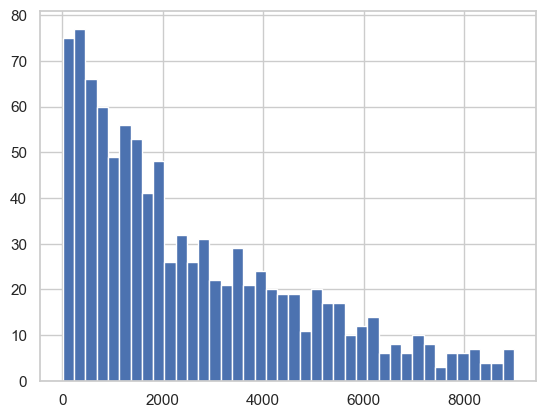

In [21]:
df.TotalSales.hist(bins = 40)

In [19]:
#Verifico los valores por encima de 9000
df[df.TotalSales > 9000]

,OrderID,Date,Product,Category,Price,Quantity,TotalSales,Region
411,6d1897e6-8f73-4073-8d89-2d5e0f395bec,2025-01-04,Tonight,Clothing,475.79,19,9040.01,South
597,03a31658-3c96-44c9-beb8-c509f9b3bb1c,2025-01-06,Market,Clothing,493.16,20,9863.20,North


In [30]:
df=df[df.TotalSales < 9000]

In [33]:
df_data_processing = df.copy()
df_data_processing.drop('OrderID',axis=1,inplace=True)
df_data_processing.drop('Date',axis=1,inplace=True)
df_data_processing.drop('Product',axis=1,inplace=True)

## Analisis de datos

In [46]:
sales_by_category = df.groupby('Category')['TotalSales'].sum()
sales_by_region = df.groupby('Region')['TotalSales'].sum()

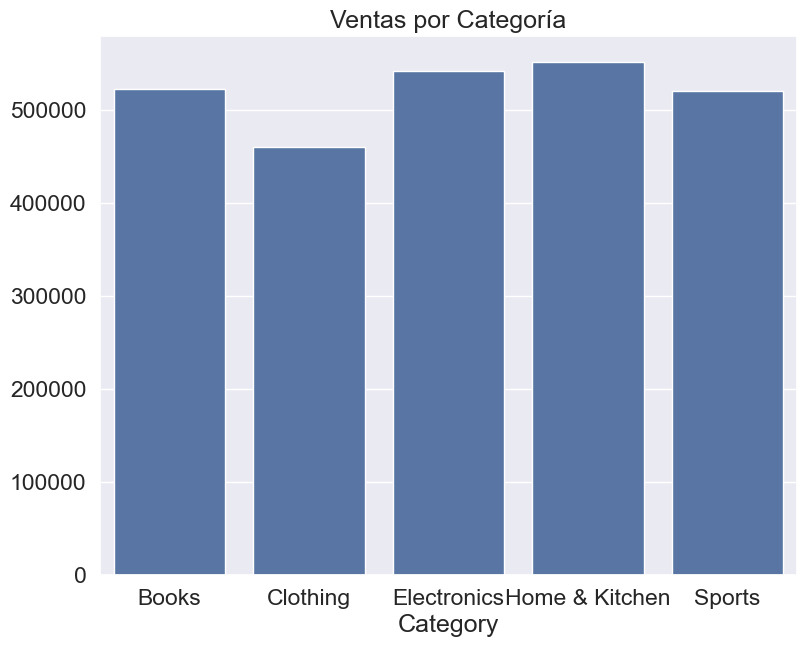

In [63]:
fig = plt.figure(figsize=(9,7))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title('Ventas por Categoría')
plt.show()

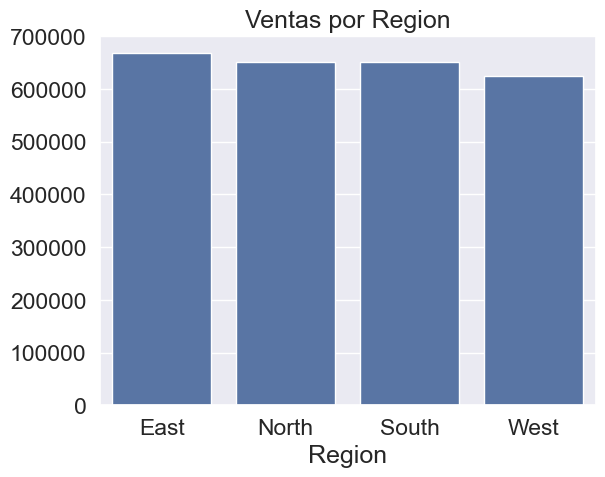

In [48]:
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title('Ventas por Region')
plt.show()

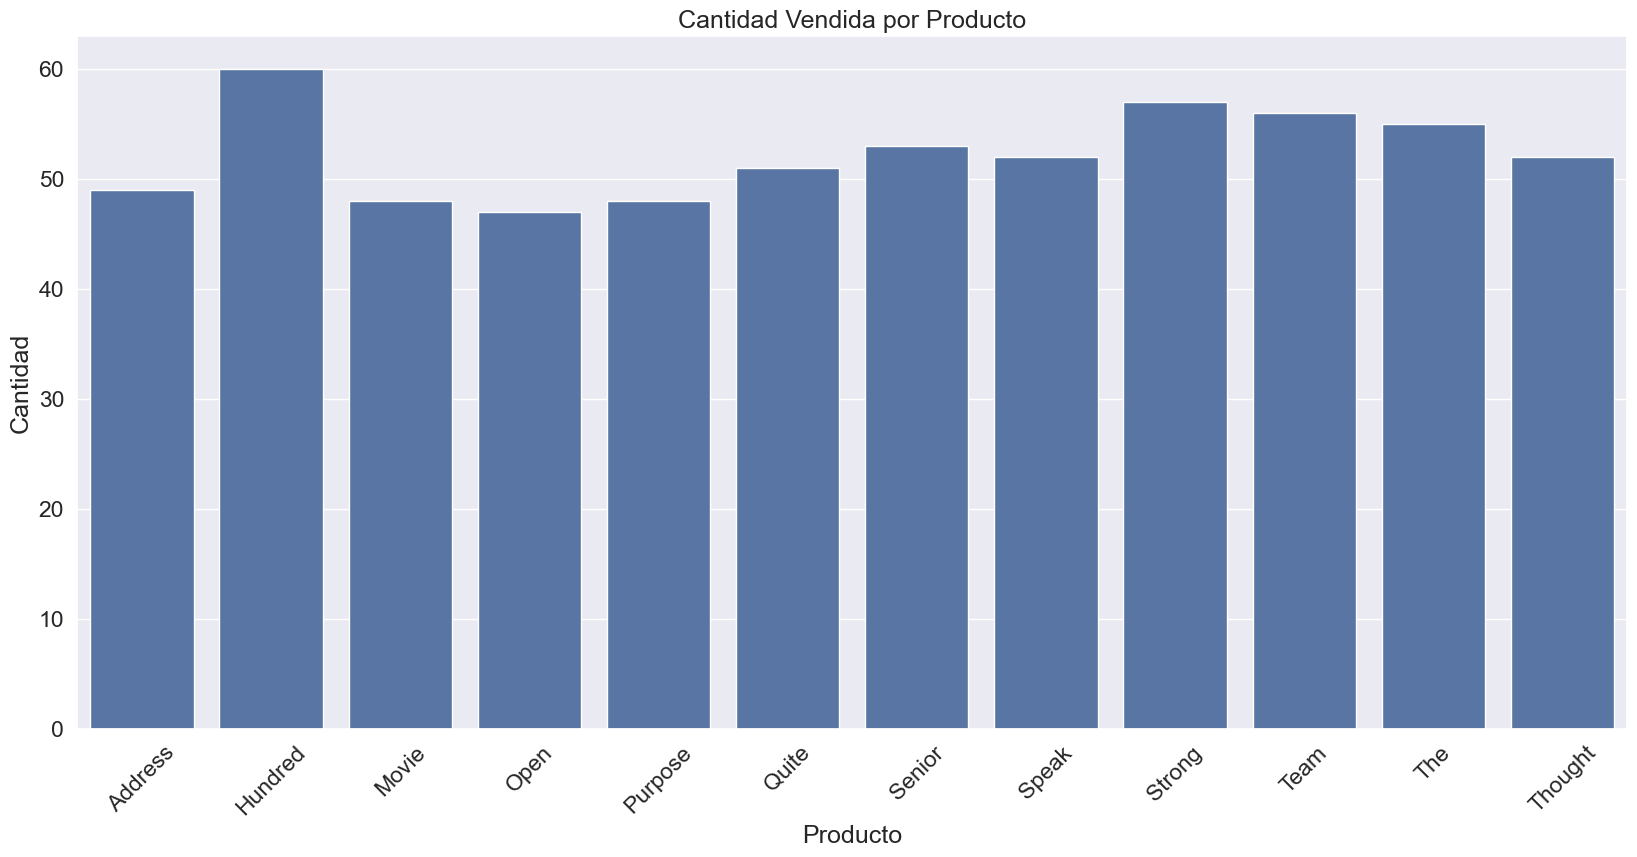

In [58]:
fig = plt.figure(figsize=(20,9))
product_sales = df.groupby('Product')['Quantity'].sum()
filtered_product_sales = product_sales[product_sales > 45]
sns.barplot(x=filtered_product_sales.index, y=filtered_product_sales.values)

plt.title('Cantidad Vendida por Producto')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  
plt.show()


In [55]:
#pd.set_option('display.max_rows',None)
product_sales

Product
Ability     9
About       3
Accept     28
Account    14
Across     39
           ..
Wrong       1
Yard       13
Yeah       38
Year        1
Your       38
Name: Quantity, Length: 621, dtype: int64

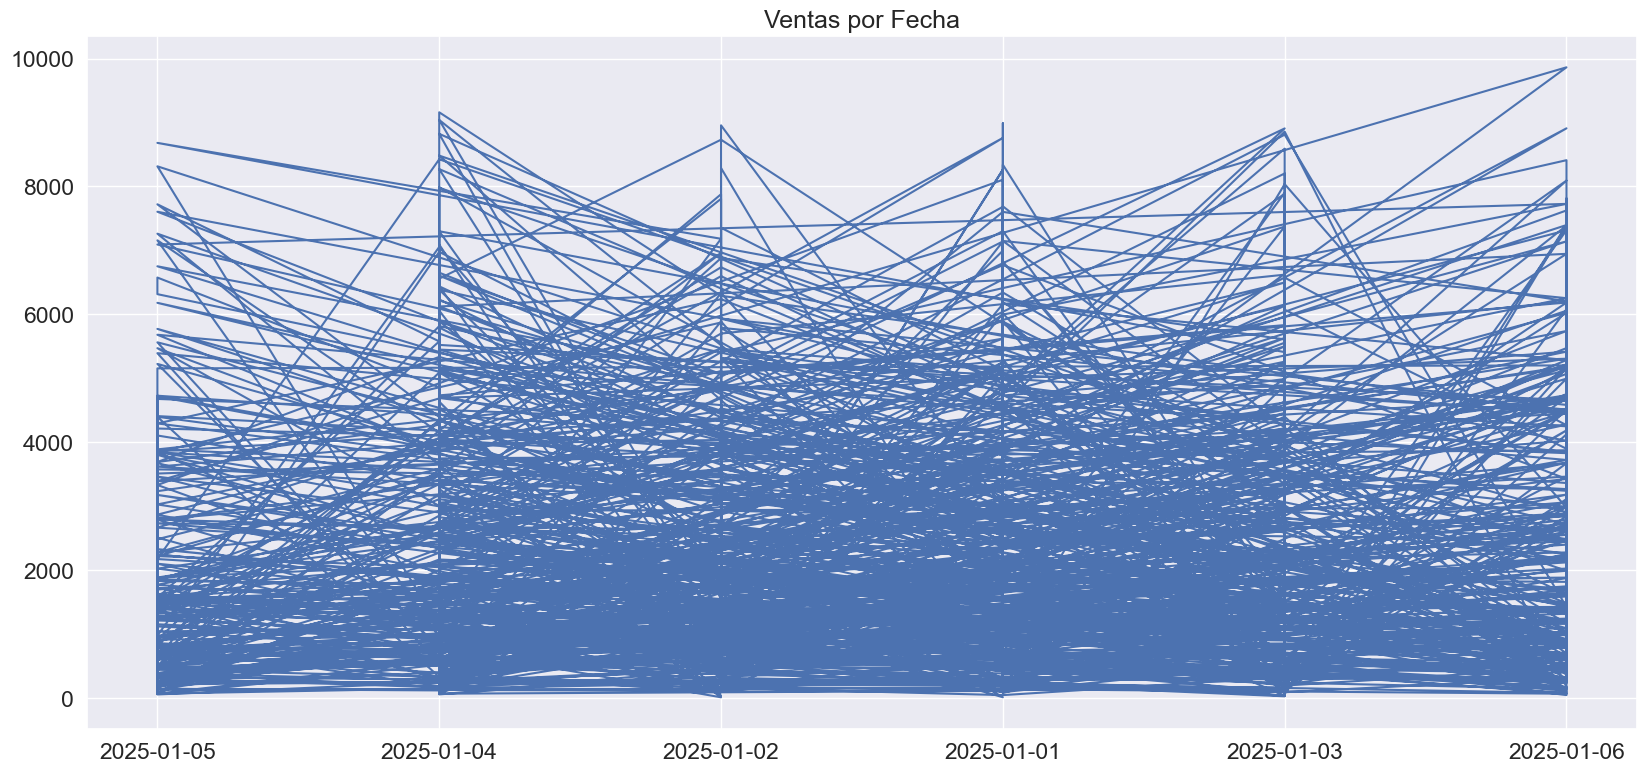

In [54]:
fig = plt.figure(figsize=(20,9))
plt.plot(df['Date'], df['TotalSales'])
plt.title('Ventas por Fecha')
plt.show()

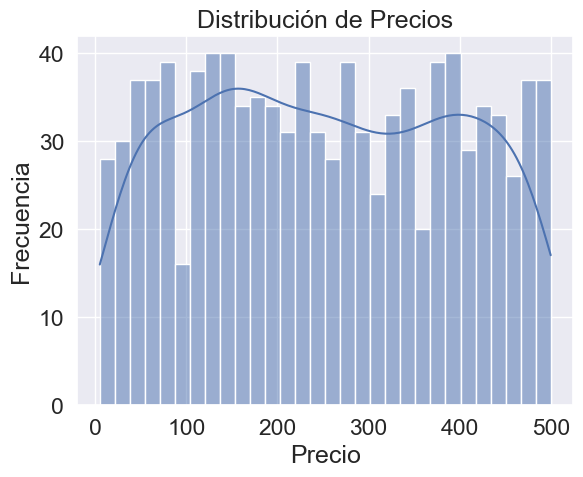

In [50]:
#Representa la cantidad de observaciones
sns.histplot(data=df, x='Price', bins=30, kde=True)

plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.show()

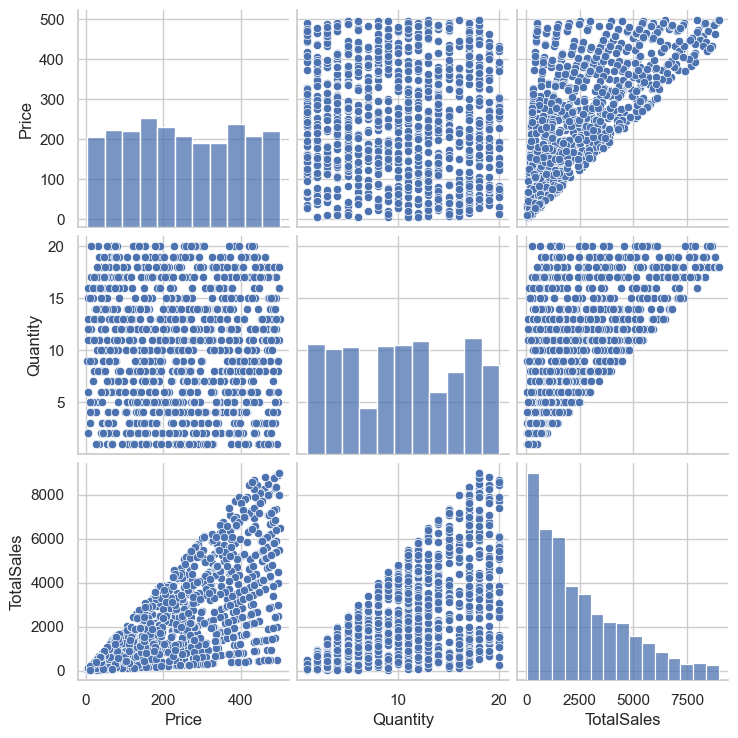

In [22]:
sns.pairplot(df, height= 2.5)
plt.show()

<Axes: >

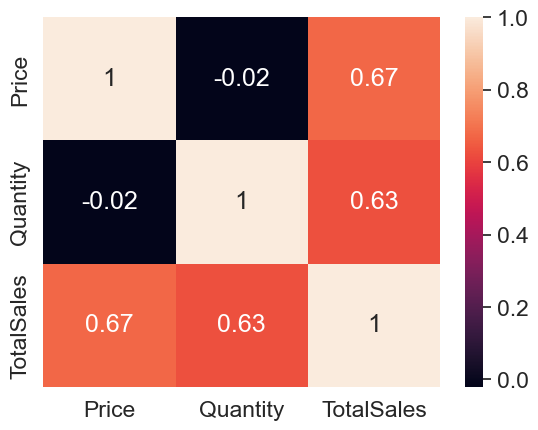

In [24]:
numeric_cols = ['Price','Quantity','TotalSales']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols)

In [38]:
df_data_processing = pd.get_dummies(df_data_processing,columns=['Category','Region'],drop_first = True)
df_data_processing.head()

,Price,Quantity,TotalSales,Category_Clothing,Category_Electronics,Category_Home & Kitchen,Category_Sports,Region_North,Region_South,Region_West
1,197.62,9,1778.58,False,False,True,False,True,False,False
2,118.64,1,118.64,False,True,False,False,True,False,False
3,71.66,2,143.32,False,False,False,True,False,False,False
4,55.14,2,110.28,False,False,False,True,False,False,True
5,361.32,14,5058.48,False,False,False,False,False,False,True


## Modelado

In [39]:
X_cols = list(set(df_data_processing.columns)-set(['TotalSales']))
Y_col = ['TotalSales']

X = df_data_processing[X_cols].values
Y = df_data_processing[Y_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

In [40]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [41]:
y_pred.shape

(248, 1)

## Evaluando el modelo

In [42]:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)

print("R2: ", r2)
print("MSE: ", mse)

R2:  0.8643642083046763
MSE:  0.1149299834135408


In [43]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model = sm.OLS(Y_train, X_train_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     533.8
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          7.22e-315
Time:                        12:17:23   Log-Likelihood:                -320.55
No. Observations:                 743   AIC:                             661.1
Df Residuals:                     733   BIC:                             707.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.014      0.626      0.5

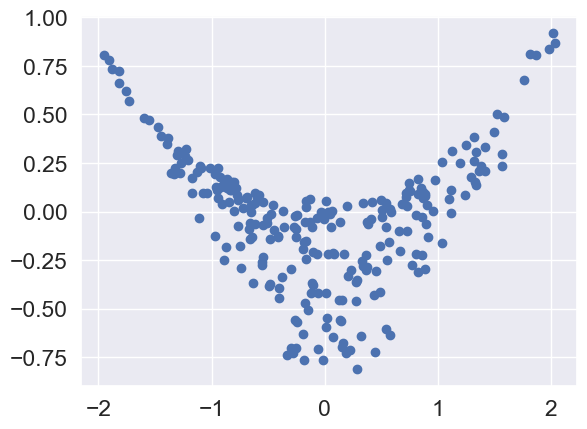

In [44]:
residuals = np.subtract(Y_test, y_pred)
plt.scatter(y_pred, residuals)
plt.show()

## Ajustando el modelo
coef: El coeficiente de la variable. Indica cuánto cambia 
𝑦 y en promedio por cada unidad adicional de esa variable, manteniendo las demás constantes.

std err: El error estándar del coeficiente. Valores más bajos indican mayor precisión en la estimación.

t: Estadístico 𝑡 t, que evalúa si el coeficiente es significativamente diferente de 0.

P>|t|: El valor 𝑝 p. Si es menor a 0.05, la variable es estadísticamente significativa (afecta 𝑦 y).

[0.025, 0.975]: Intervalo de confianza del 95% para el coeficiente.


In [ ]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['fumadorconsobrepeso'] = df_second.sobrepeso * df_second.smoker_yes

In [ ]:
X_cols = list(set(df.columns)-set(['charges']))
Y_col = ['charges']

X = df_second[X_cols].values
Y = df_second[Y_col].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(Y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

Y_train = sc_y.transform(Y_train)
Y_test = sc_y.transform(Y_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)

print("R2 ", r2)
print("MSE ", mse)

In [ ]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

model = sm.OLS(Y_train, X_train_sm)
results = model.fit()

print(results.summary())

In [ ]:
X_cols

In [ ]:
column_dict = {i: X_cols[i] for i in range(len(X_cols))}

print(column_dict)

In [ ]:
residuals = np.subtract(Y_test, y_pred)
plt.scatter(y_pred, residuals)
plt.show()

## Exportar los Coeficientes y Métricas del Modelo:

In [ ]:
coef_df = pd.DataFrame({
    "Variable": results.model.exog_names,  # Nombres de las variables
    "Coeficiente": results.params,        # Coeficientes del modelo
    "Std_Error": results.bse,             # Error estándar
    "P-Valor": results.pvalues,           # P-valores
    "Intervalo_Conf_95%_Inferior": results.conf_int()[0],
    "Intervalo_Conf_95%_Superior": results.conf_int()[1]
})

coef_df

In [ ]:
coef_df.to_csv("resultados_modelo.csv", index=False)

In [ ]:
pred_df = pd.DataFrame({
    "Valor_Real": Y_train,               
    "Valor_Predicho": results.predict(X_train_sm)  
})


In [ ]:
pred_df.to_csv("predicciones_modelo.csv", index=False)